# Visualization of the survey data on a map of Uganda

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
csv = pd.read_csv('Uganda2012Consumption_cluster.csv')

BAD = 179
csv = csv.drop(csv.index[BAD])

#BAD = [10210016, 30130033]
#csv[csv.comm != BAD]

ll = csv.values[:, 4:6]
img_ids = csv.values[:, 0]

In [19]:
LONS = (29.573518, 35.033072)
LATS = (-1.482273, 4.218528)
IMGSZ = (1594, 1530)

KMP_LONS = (32.508143, 32.689789)
KMP_LATS = (0.214485, 0.413972)

In [20]:
lons = IMGSZ[1] * (ll[:,1] - LONS[0]) / (LONS[1] - LONS[0])
lats = IMGSZ[0] * (1 - (ll[:,0] - LATS[0]) / (LATS[1] - LATS[0]))

In [21]:
kmp_indx = [False] * len(lons)
for ix in range(len(lons)):
    if KMP_LONS[0] <= ll[ix,1] <= KMP_LONS[1] and KMP_LATS[0] <= ll[ix,0] <= KMP_LATS[1]:
        kmp_indx[ix] = True

kmp_lons = lons[kmp_indx]
kmp_lats = lats[kmp_indx]

In [22]:
urb_indx = csv.values[:,8] == 1
urb_lons = lons[urb_indx]
urb_lats = lats[urb_indx]

sub_indx = csv.values[:,8] == 0
sub_lons = lons[sub_indx]
sub_lats = lats[sub_indx]

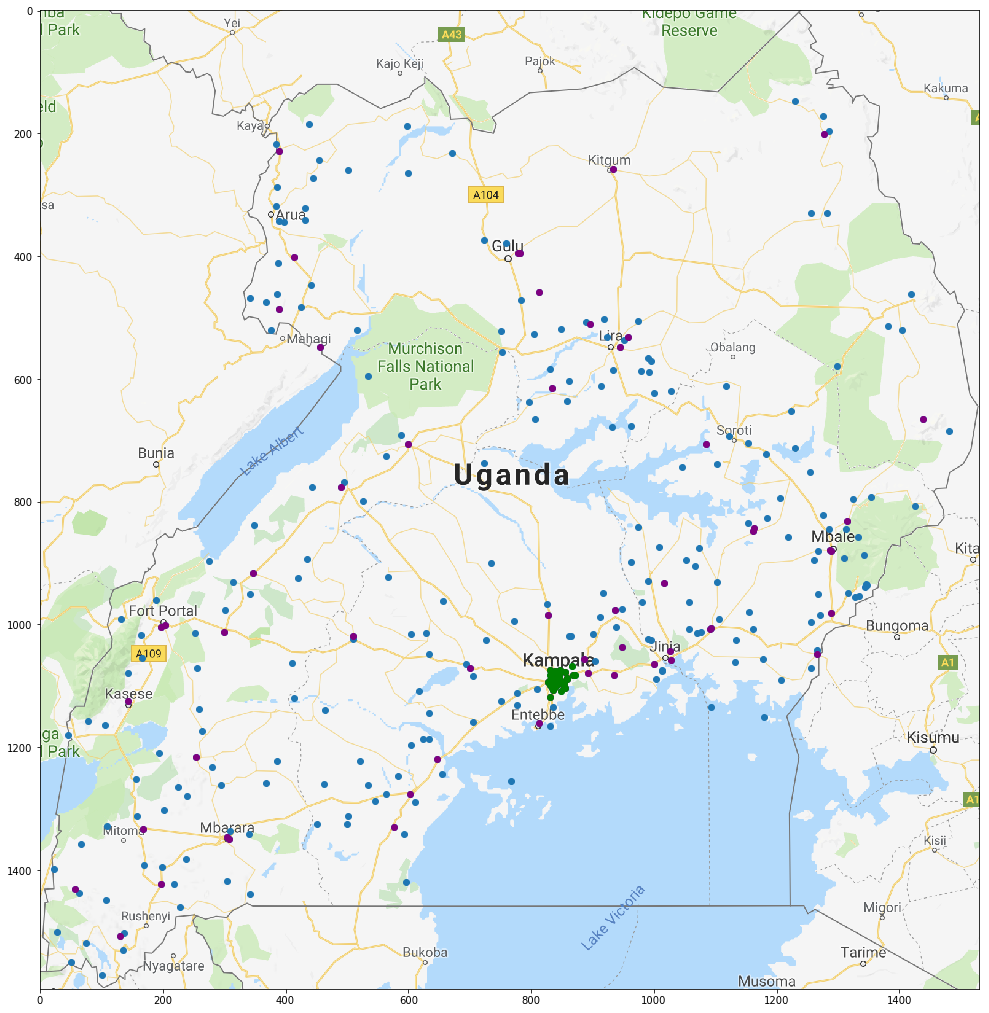

In [23]:
plt.rcParams['figure.figsize'] = [(1594.0/1530.0)*18, 18]

plt.scatter(kmp_lons, kmp_lats, color='green', zorder=4)
plt.scatter(urb_lons, urb_lats, color='purple', zorder=3)
plt.scatter(lons, lats, zorder=2)

img = mpimg.imread('uganda_map.png')
imgplot = plt.imshow(img, zorder=1)

plt.show()

In [24]:
kmp_ids = csv.values[:,0][kmp_indx].astype(np.uint32)
urb_ids = csv.values[:,0][urb_indx].astype(np.uint32)

print(kmp_ids)

[10210001 10210002 10210003 10210004 10210005 10210006 10210007 10210009
 10210010 10210011 10210012 10210013 10210014 10210015 10210016 10210017
 10210018 10210019 10210020 10210021 10210022 10210023 10210024 10210026
 10210027 10210028 10210029 10210030 10210031 10210032 10210033 10210034
 10830023 11310003 11310004 11310006 11310007 11330019 11330021 11330023
 11330025]


In [25]:
def show_ids(ids, zoom=None):
    plt.rcParams['figure.figsize'] = [(1594.0/1530.0)*18, 18]
    
    img_list = img_ids.tolist()
    
    mask = [False] * len(lons)
    for img_id in ids:
        idx = img_list.index(img_id)
        mask[idx] = True
    
    mask_lons = lons[mask]
    mask_lats = lats[mask]
    
    plt.scatter(mask_lons, mask_lats, color='red', zorder=3)
    plt.scatter(lons, lats, zorder=2)

    img = mpimg.imread('uganda_map.png')
    imgplot = plt.imshow(img, zorder=1)

    if zoom == 'kmp':
        plt.axis([740, 940, 1200, 1000])
        
    plt.show()

In [31]:
from scipy import spatial

def closest_to(x, y):
    lon = (x / IMGSZ[1]) * (LONS[1] - LONS[0]) + LONS[0]
    lat = (1 - (y / IMGSZ[0])) * (LATS[1] - LATS[0]) + LATS[0]
    
    pt = [lat, lon]
    print(ll[spatial.KDTree(ll).query(pt)[1]])
    _, index = spatial.KDTree(ll).query(pt)
    print("index = %d" % index)
    return index

In [38]:
index = closest_to(1200, 1150)
closest_img = img_ids[index]
print("closest_img = %d" % closest_img)

[  0.10399945  33.783092  ]
index = 109
closest_img = 20130009


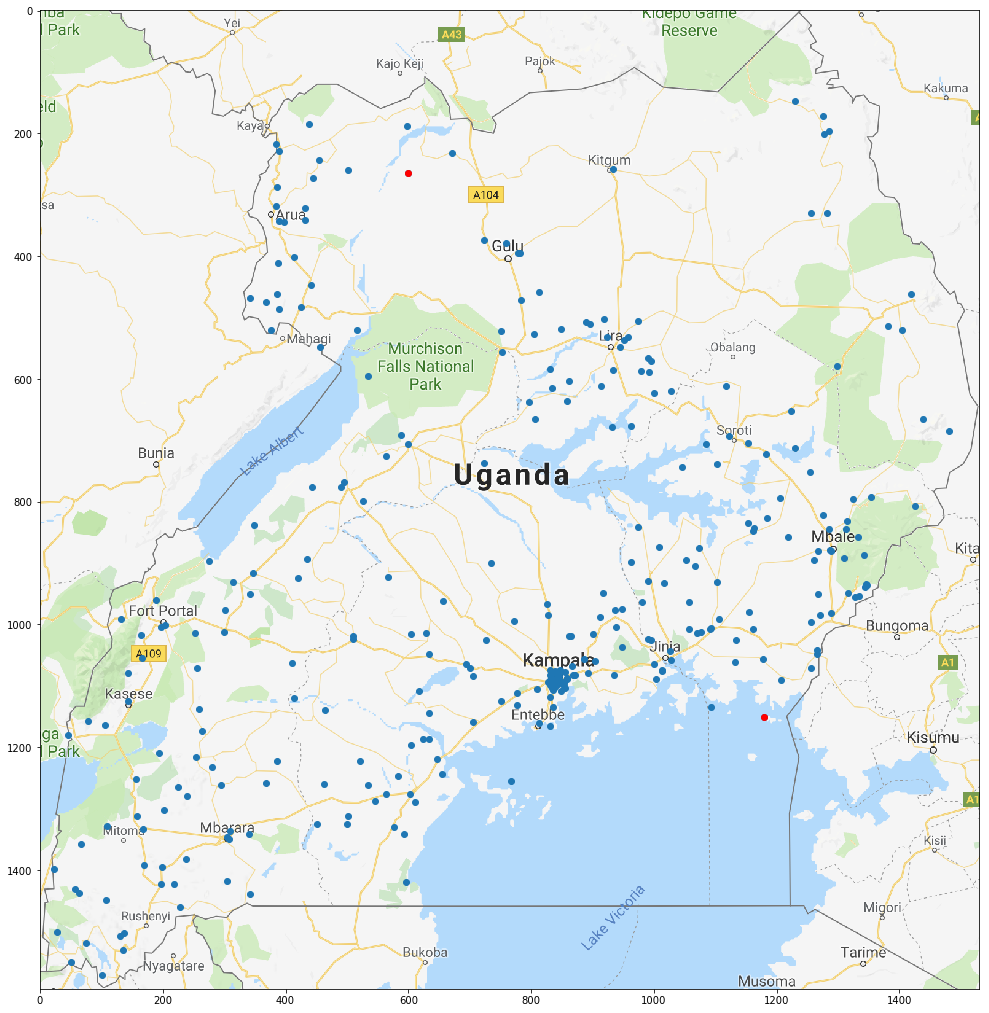

In [40]:
ids = [closest_img, 30930001]
show_ids(ids, zoom=None)